# ADVANCED STATISTICS FOR PHYSICS ANALYSIS - Fourth Lab

### Student: Alessandro Marcomini (2024286)


### Date: May 9, 2021

############################################################################################################################

**NOTE OF THE AUTHOR: For the first couple of exercises below I found more convenient working on RStudio Cloud, instead of jupyter notebook, since it provides better real-time visualization. Moreover, I enjoyed combining the first them as a unique project which I decided to turn into a game to make more enjoyable the analysis (I made my family play it too). Hence, for those exercise I will provide instructions to run the code, a figure showing the results and some additional comments. Moreover, in the cloud folder I linked I also put a brief video of myself explayining my work. Please have fun!**

The project directory is [here](https://rstudio.cloud/spaces/142538/join?access_code=hFmSADnhLR4DMHT71Z1yH9UNsNKtzOWPtJrQLL%2BC). You can find codes for all the exercises (as .R documents) in the "files" folder on the bottom-right side (I report them here as well for convenience, but running them on this notebook could lead to errors for some display functions I used which are meant expecially for RStudio Cloud). 
- "SixBoxesGame.R" is the code for the first and second exercise;
- "Erlang_sampler.R" is the code for the third exercise;
- "VonNeumann_RNG.R" is the code for the fourth exercise.

To run one exercise go to the console panel (bottom-left side) and type:

source('/cloud/project/FILENAME')

where FILENAME corresponds to one of the three files between quotes listed above. After that, follow the instructions.

##########################################################################################################################################################################################################################################

## Exercise 1 - Six Boxes Toy Model : inference
- The six boxes toy model is described in [here](https://arxiv.org/pdf/1612.05292.pdf). Labeling the boxes as follows: 
![title](Images/SixBoxes.png)

#### Write a program in R that:
- Allows the user to insert the color of a randomly extracted box;
- Prints on the standard output the probability of selecting each box;
- Plots the probability for each box as a function of the extraction step.

#### Theory:
As for the posterior calculation, at each iteration $i$ I calculated the prior as the posterior at the iteration $i-1$, while the likelihood is independent on the iteration and is defined as:

$$
f(E | B_j) = \left\{ \begin{array}{2}
\frac{j}{5} & \mbox{if E = white} \\
\frac{5-j}{5} & \mbox{if E = black}
\end{array}
\right.
$$

Finally, the evidence can be found as the sum over all the boxes of the prior times the likelihood.

#### Solution:
- Go to project directory: [here](https://rstudio.cloud/spaces/142538/join?access_code=hFmSADnhLR4DMHT71Z1yH9UNsNKtzOWPtJrQLL%2BC)
- Type on console: source('/cloud/project/SixBoxesGame.R')
- Once launched, select the first game mode (player_mode, or just type: 0)
- You will see plots and posteriors updating after each input

#### Code (not working, just for knowledge):

In [ ]:
#FUNCTIONS

#Likelihood calculation
calc_L <- function(val, j){
  if (val == 1){return (j/5)}
  if (val == 0){return ((5-j)/5)}
  else return (NA)
}

#Ball extraction
trial <- function(p_white){
  u <- runif(1,0,1)
  if (u <= p_white){1}
  else {0}
}

#Check guess
check_guess <- function(true,guess,spent,wallet){
  if (guess==true){
    message('FANTASTICO! YOU WON! you added ',wallet,' coins to your wallet!')
    wallet = (wallet*2)+spent
    }
  else{
    message('MANNAGGIA! YOU LOST! The real box was B',true,'! You spent ',spent,' coins for nothing... retry!')
    wallet = wallet
    }
}

#Function for plotting results
red = rgb(1.0,0,0,alpha=0.125)
green = rgb(0,1.0,0,alpha=0.125)
white = rgb(1.0,1.0,1.0,alpha=0.125)

plot_pdf <- function(posteriors){
  
  par(mfrow=c(2,3), oma = c(0, 0, 2, 0))
  
  for (i in 1:dim(posteriors)[1]){
    box = rownames(posteriors)[i]
    color = ifelse((posteriors[i,dim(posteriors)[2]]==0), red,
                   ifelse((posteriors[i,dim(posteriors)[2]]==max(posteriors[,dim(posteriors)[2]])), green, white))
    plot(posteriors[box,], pch=20, cex=1, ylim=c(0,1),
         xlab = 'Trial', ylab = 'Probability',
         main = box, cex.main=1, cex.lab=1)
    rect(par("usr")[1],par("usr")[3],par("usr")[2],par("usr")[4],col = color)
    grid()
  }
  mtext('Six Boxes Toy Model Game', outer = TRUE, cex = 1.7)
  
}

In [ ]:
#Code for Exercise 01 (player_mode):
  message('NOTE: probabilities and plots will be automatically generated after the second input.')
  #First iteration
  x = strtoi(readline(prompt = "Insert color (0=Black, 1=White, 2=Stop): "))
  
  prior <- array(rep(1/6,6))
  Like <- c(calc_L(x,0),calc_L(x,1),calc_L(x,2),calc_L(x,3),calc_L(x,4),calc_L(x,5))
  Z = sum(Like*prior)
  posterior <- Like*prior/Z
  posteriors <- posterior
  
  #Later iterations                   
  while (x != 2){
    if (x == 2){break}
    x = strtoi(readline(prompt = "Insert color (0=Black, 1=White, 2=Stop): "))
    prior <- posterior
    Like <- c(calc_L(x,0),calc_L(x,1),calc_L(x,2),calc_L(x,3),calc_L(x,4),calc_L(x,5))
    Z = sum(Like*prior)
    posterior <- Like*prior/Z
    posteriors <- cbind(posteriors,posterior)
    print(posterior)
    colnames(posteriors) <- 0:(dim(posteriors)[2]-1)
    rownames(posteriors) <- c('B0','B1','B2','B3','B4','B5')
    plot_pdf(posteriors)
  }   
print('Goodbye, and thanks for playing! :)')

### RStudio Cloud visualization

![Ex01](Images/Ex01.png)

As we can see the program works fine: the plot updates after each iteration and marks in red the out-of-the-picture boxes once their probability goes to 0, while highlights in green the most probably box. In the panel on the top-left we can see the History of the posteriors, which are coherent with the input values the system processed: at the very beginning the first blacks drawn make the last box impossible, while the low-number boxes are more probable. Then, the large amount of whites reverses the situation, cutting off the B0 box and enlarging the probabilities of the second-row boxes.

## Exercise 2 - Six Boxes Toy Model : simulation
- Consider again the six boxes toy model of the previous exercise.

#### Write a simulation program in R that:
- Selects a random box;
- Makes random sampling from the box;
- Prints on the standard output the probability of selecting each box;
- Plots the probability for each box as a function of the number of trial.

#### Solution:
- Go to project directory: [here](https://rstudio.cloud/spaces/142538/join?access_code=hFmSADnhLR4DMHT71Z1yH9UNsNKtzOWPtJrQLL%2BC)
- Type on console: source('/cloud/project/SixBoxesGame.R')
- Once launched, select the second game mode (beat_the_system, or just type: 1)
###### Rules:
- I developed this exercise as a game: player versus computer. As requested, the computer will autonomously select a box and draw balls from it with replacement, but the number of trials will be decided by the user. In particular, at the beginning of the game the user will have a certain amount of coins, which will allow the player to "buy" one trial each. Hence, the user pays for a certain amount of trials, the system draws this number of balls and provides posteriors and plots, according to the model. At this point, the user can buy another set of trials to increase his/her knowledge or try to guess the systems' box: if guesses correcly, the user earns back all spent coins and doubles the ones he/she did not spend. Otherwise, he/she loses everything spent. Easy enough? Let's play!
- Note: in this case I had to choose between making the simulation run fast and printing the posteriors after each trial (since the latter requires some non-negligible time). I opted for the first, thus the system will draw two balls per second from its box but the posteriors will be displayed only after the last requested trial. In any case, the plots will upload after each new trial (twice per second).

#### Code (not working well on here, just for knowledge):

In [ ]:
#Code for Exercise 02 (beat_the_system):
  wallet = 30
  spent = 0
  play = 'y'
  
  while(play=='y'){
    #Box draw
    message('You have ',wallet,' coins in your wallet.')
    max_tr = strtoi(readline(prompt = "How many trials do you want to buy? "))
    while(max_tr < 1 || max_tr > wallet){
      message('Invalid number: check your wallet')
      max_tr = strtoi(readline(prompt = "How many trials do you want to buy? "))
      }
    
    #First iteration
    box_j = floor(runif(1,0,6))
    p_white = box_j/5
    x = trial(p_white)
    
    prior <- array(rep(1/6,6))
    Like <- c(calc_L(x,0),calc_L(x,1),calc_L(x,2),calc_L(x,3),calc_L(x,4),calc_L(x,5))
    Z = sum(Like*prior)
    posterior <- Like*prior/Z
    posteriors <- posterior
    tr = 1
    
    #Later iterations
    while(max_tr != 0){
    wallet = wallet - max_tr
    spent = spent + max_tr
      while (tr <= max_tr){
        x = (trial(p_white))
        prior <- posterior
        Like <- c(calc_L(x,0),calc_L(x,1),calc_L(x,2),calc_L(x,3),calc_L(x,4),calc_L(x,5))
        Z = sum(Like*prior)
        posterior <- Like*prior/Z
        posteriors <- cbind(posteriors,posterior)
        print(x)
        print(posterior)
        colnames(posteriors) <- 0:(dim(posteriors)[2]-1)
        rownames(posteriors) <- c('B0','B1','B2','B3','B4','B5')
        plot_pdf(posteriors)
        tr = tr+1
        Sys.sleep(0.5)
      }   
    
    message('You have ',wallet,' coins in your wallet.')
    max_tr = strtoi(readline(prompt = "How many more trials do you want to buy? (Type 0 to move to guess) "))
    tr = 1
    }
    
    guess = strtoi(readline(prompt = "Enter the number of your guessed box: "))
    wallet = check_guess(box_j,guess,spent,wallet)
    spent = 0
    play = readline(prompt = "Would you like to play again? (y/n) ")
  }
print('Goodbye, and thanks for playing! :)')

### RStudio Cloud visualization

![Ex02](Images/Ex02.png)

Here is an example of how I implemented the second exercise as a game: starting with a wallet of 30 coins, I spent 15 of them to make the system sample 15 balls from a randomply chosen box. Then, looking at the updated posteriors (top-left) and plots (bottom-right) I infered that the computer's box should have been B4 (the most probable). If I did not consider the statistics large enough, I could have bought more samples. Finally, since I guessed correctly, I earned back my coins plus additional 15 coins.

As for the code, plot and data, everything is similar to the previous point (both as for computation and visualization).

## Exercise 3 - Erlang random sampler
- An important property of the gamma distribution is the so-called *reproductive property*: given a sequence of independent random variables $X_j \sim \Gamma(\alpha_j, \beta)$, it follows that

$$
Y = \sum_{j=1}^n X_j \implies Y \sim \Gamma(\alpha,\beta) \mbox{ where } \alpha=\sum_{j=1}^n \alpha_j
$$

if $\alpha=m$ is an integer, a random variable from Gamma distribution $\Gamma(m, \beta)$ (also known as **Erlang distribution**) can be obtained by summing $m$ independent exponential random variables $X_j \sim Exp(\beta)$:

$$
Y = \frac{1}{\beta}\sum_{j=1}^n (-\ln U_j) = - \frac{1}{\beta} \ln \left(\prod_{j=1}^n U_j\right) \mbox{ where } U_j \sim \mathcal{U}(0,1)
$$

#### Write an algorithm to sample variables from an Erlang distribution.

#### Solution on RStudio:
- Go to project directory: [here](https://rstudio.cloud/spaces/142538/join?access_code=hFmSADnhLR4DMHT71Z1yH9UNsNKtzOWPtJrQLL%2BC)
- Type on console: source('/cloud/project/Erlang_sampler.R')

Alternatively, for this algorithm the output is easily readable also on jupyter:
#### Code:

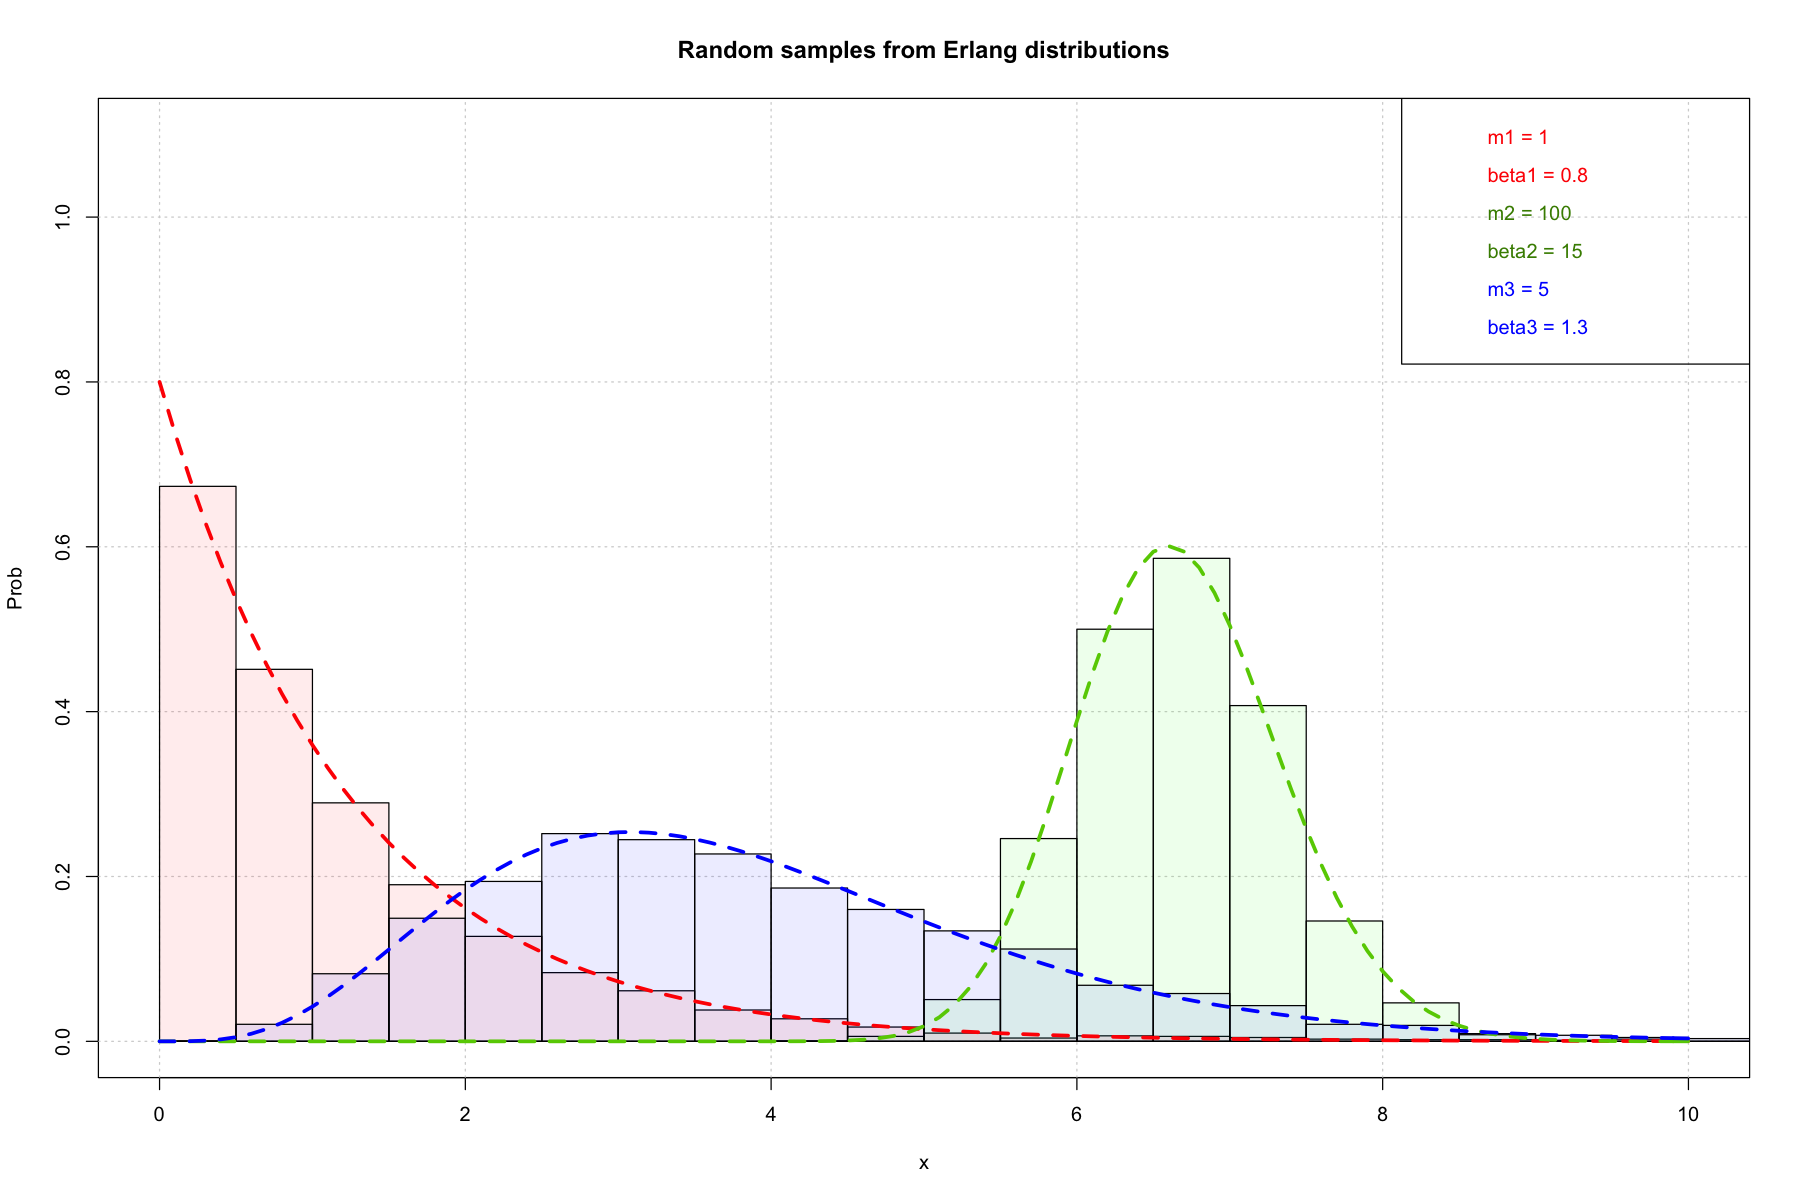

In [2]:
#Define function to sample single random variable, recalling Erlang distribution properties
y_gen <- function(m, beta){
  u = runif(m)
  y <- -log(prod(u))/beta    
}

#Define function for sampling n random values  
rerlg <- function(n, m, beta){
  M = rep(m,n)
  Y <- Vectorize(y_gen)(M, beta)
}


#set function params
set.seed(2024286)
n.samples = 3000
m1 = 1
m2 = 100
m3 = 5
beta1 = .8
beta2 = 15
beta3 = 1.3

#Create histograms
histo_data_1 <- rerlg(n.samples,m1,beta1)
histo_data_2 <- rerlg(n.samples,m2,beta2)
histo_data_3 <- rerlg(n.samples,m3,beta3)

#Plot
options(repr.plot.width=15, repr.plot.height=10)
x <- seq(0,10,0.1)

col1 <- rgb(255, 0, 0, max = 255, alpha = 20, names = "red50")
col2 <- rgb(0, 255, 0, max = 255, alpha = 20, names = "green50")
col3 <- rgb(0, 0, 255, max = 255, alpha = 20, names = "blue50")

PDF_data_1 = dgamma(x,shape=m1,rate=beta1)
PDF_data_2 = dgamma(x,shape=m2,rate=beta2)
PDF_data_3 = dgamma(x,shape=m3,rate=beta3)
plot(x,PDF_data_1, pch=20, cex=0, col='red', xlab = 'x',ylab='Prob', 
     main = 'Random samples from Erlang distributions', ylim=c(0,1.1))
grid()
breaks = seq(0,20,0.5)
hist(histo_data_1, breaks = breaks, prob = TRUE, add=TRUE, col = col1)
hist(histo_data_2, breaks = breaks, prob = TRUE, add=TRUE, col = col2)
hist(histo_data_3, breaks = breaks, prob = TRUE, add=TRUE, col = col3)

lines(x,PDF_data_1, col='red', lty = 2, lw=3)
lines(x,PDF_data_2, col='chartreuse3', lty = 2, lw=3)
lines(x,PDF_data_3, col='blue', lty = 2, lw=3)

leg_names <- c('m1 = 1','beta1 = 0.8','m2 = 100',
               'beta2 = 15','m3 = 5','beta3 = 1.3')
legend('topright', leg_names, cex=1, text.col=c('red','red','chartreuse4',
                                             'chartreuse4','blue','blue'))

As the plot above suggests, the random number sampler perfectly matches the theorethical curves of Gamma functions with integere $\alpha=m$ for $n=3000$ samples. This is a visual proof of the reproductive property of those distributions.

## Exercise 4 - Middle square algorithm
- One of the first random number generators was proposed by von Neumann, the so-called **middle square algorithm**.
#### Write R code to implement this type of generator and, given a fixed digit number input, square it an remove the leading and trailing digits, in order to return a number with the same number of digits as the original number.

Suggestion : after having squared the number, convert it to a list of characters (number <- unlist(strsplit(as.character(x.squared),""))) and, after having removed the head and tail of the list, convert it back to a number (as.numeric(paste(number.after.trimming, collapse="")))

#### Solution:
I decided not to use strings to perform this exercise, but to exploit the $log10$ function to get the number of input digits together with $floor()$ which returns the integer part of a positive number. In fact, given input $X$ of length $L$ then $Y=X^2$ can have length $2L$ or $2L+1$, so setting the lower margin as $LM = \lfloor length(X^2) \rfloor$ (where the parentheses indicate the $floor()$ operation) I can get rid of the tail simply by:

$$
Y = \lfloor \tfrac{X^2}{10^{LM}} \rfloor
$$

While to get rid of the exceeding top part I simply redefine:

$$
Y = (\tfrac{Y}{10^{L}} - \lfloor  \tfrac{Y}{10^{L}} \rfloor) \times 10^L
$$

Which will remove the integer part of Y corresponding to digits of order larger that $10^L$.

Anyhow, the compilation below proves the efficiency of this method.

#### Solution on RStudio:
- Go to project directory: [here](https://rstudio.cloud/spaces/142538/join?access_code=hFmSADnhLR4DMHT71Z1yH9UNsNKtzOWPtJrQLL%2BC)
- Type on console: source('/cloud/project/VonNeumann_RNG.R')

Alternatively, for this algorithm the output is easily readable also on jupyter:
#### Code:

How many random numbers shall I generate? : 10
Insert input number: 846374
[1] "x*x= 716348947876"
[1] "random number: 348947"
[1] "x*x= 121764008809"
[1] "random number: 764008"
[1] "x*x= 583708224064"
[1] "random number: 708224"
[1] "x*x= 501581234176"
[1] "random number: 581234"
[1] "x*x= 337832962756"
[1] "random number: 832962"
[1] "x*x= 693825693444"
[1] "random number: 825693"
[1] "x*x= 681768930249"
[1] "random number: 768930"
[1] "x*x= 591253344900"
[1] "random number: 253344"
[1] "x*x= 64183182336"
[1] "random number: 831823"
[1] "x*x= 691929503329"
[1] "random number: 929503"
[1] "The vector of random numbers generated is:"
 [1] 348947 764008 708224 581234 832962 825693 768930 253344 831823 929503


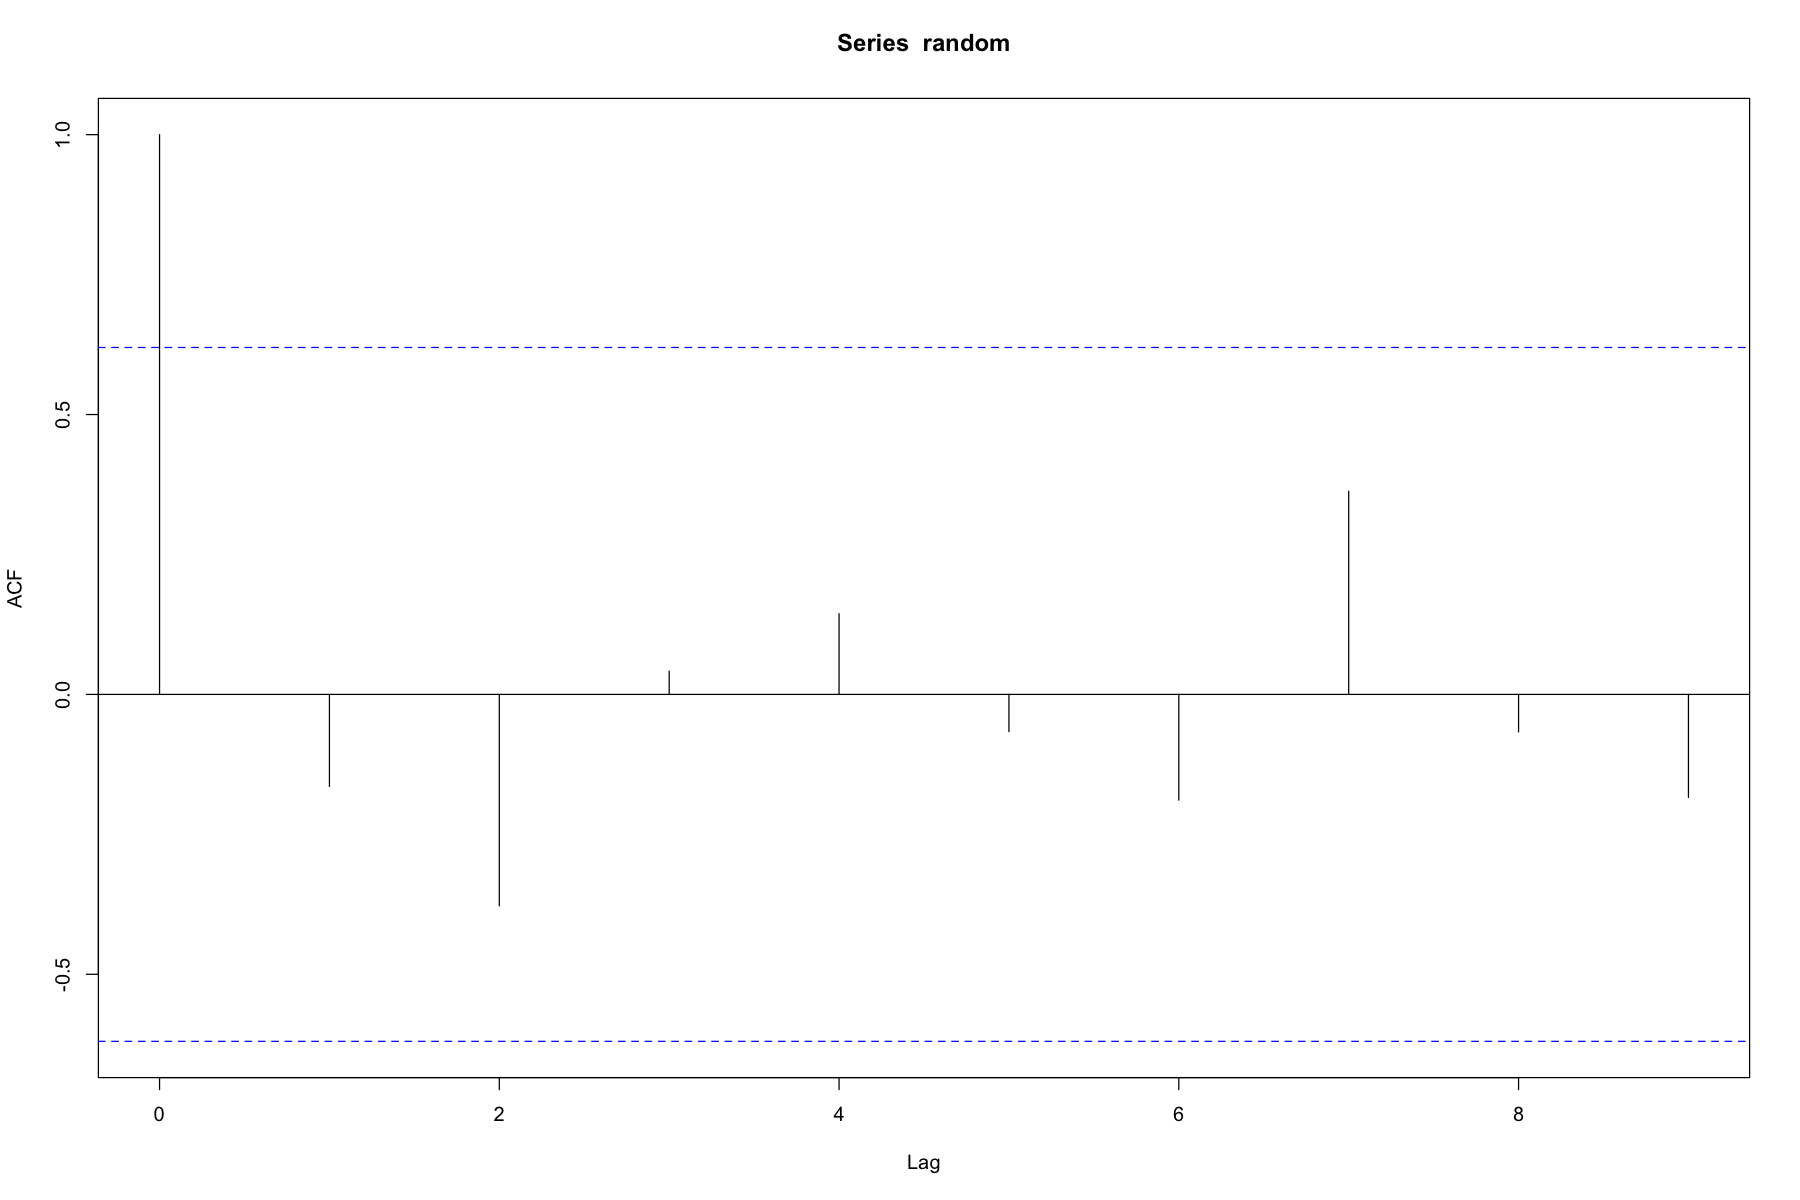

In [3]:
#Ask for introductory data
N = strtoi(readline(prompt = "How many random numbers shall I generate? : "))
x = as.numeric(readline(prompt = "Insert input number: "))

#Get length of numbers to be generated
Lx = floor(log10(x))+1
#Set iteration counter
n = 1
#Do you want to visualize data before and after cropping to check the central region is saved?
info = TRUE

#Store output
random <- rep(0,N)

#Algorithm
while(n<=N){
  #Square value
  y = x*x
  if (info){print(paste('x*x=',y))}
  Ly = floor(log10(y))+1
  
  #Consider exception for pathological values
  if (Ly<Lx){                    
    x = as.numeric(readline(prompt = "Algorithm has failed, provide new input: "))
    next
  }
  
  #Keep only the central region (lower-central, for odd number of digits)
  margin = floor((Ly-Lx)/2)
  y = floor(y/(10**margin))
  y = round(( (y/(10**Lx)) - floor(y/(10**Lx)) ) * 10**Lx) #Keep integer in case of overflow/underflow
  if (info){print(paste('random number:',y))}
  
  #Update
  random[[n]] <- y
  x = y
  n = n+1
}

#Show vector of generated data numbers and autocorrelation plot for analysis
print('The vector of random numbers generated is:')
print(random)
acf(random)

As the autocorrelation plotted above shows, those numbers are not truly random, yet at first sight it is hard to see patterns. As the complete set of prints tells, the algorithm successfully cuts the top and bottom part of $X_i^2$ to return $X_{i+1}$ as requested.

The list of values above lets see how the algorithm correctly takes the central part of the squared value $x$.